In [1]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


Read in QPM and Linear functions taken from Rascal

In [12]:
qpm_xi = np.genfromtxt('../../../Rascal/QPM_D_ngc_rsd_fix3.xi')

In [13]:
linear_xi = np.genfromtxt('../../xi_functions/linear_xi.txt',skip_header=2)

In [14]:
rr = np.genfromtxt('../../xi_functions/linear_xi.txt',max_rows=1)
mumu = np.genfromtxt('../../xi_functions/linear_xi.txt',skip_header=1,max_rows=1)

In [15]:
qpm_mean = qpm_xi.mean(axis=1)
linear_mean = linear_xi.mean(axis=1)

Display mean correlation functions over $\mu$

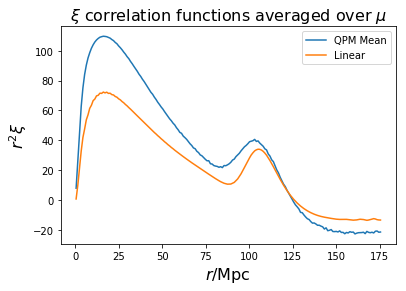

In [16]:
plt.plot(rr,qpm_mean*rr**2.,label='QPM Mean')
plt.plot(rr,linear_mean*rr**2.,label='Linear');FS=16
plt.ylabel(r'$r^2\xi$',fontsize=FS);plt.xlabel(r'$r$/Mpc',fontsize=FS);
plt.title(r"$\xi$ correlation functions averaged over $\mu$",fontsize=FS);plt.legend();

Rescale linear theory by mean(QPM/linear) over 40-60 Mpc/h

In [18]:
r_index=np.where((rr<60)&(rr>40))
rescale=np.mean(qpm_mean[r_index]/linear_mean[r_index])

In [19]:
print("Rescaling: Linear -> %.2f*Linear"%rescale)
print("i.e. bias = %.2f"%(np.sqrt(rescale/0.8)))

Rescaling: Linear -> 1.51*Linear
i.e. bias = 1.38


Now replot

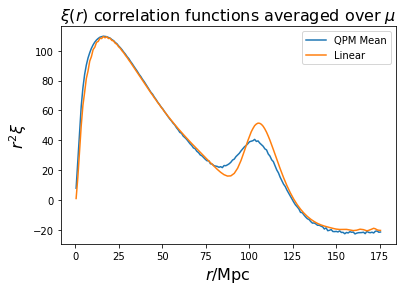

In [20]:
mu_index=0
plt.plot(rr,qpm_mean*rr**2.,label='QPM Mean')
plt.plot(rr,rescale*linear_mean*rr**2.,label='Linear');FS=16
plt.ylabel(r'$r^2\xi$',fontsize=FS);plt.xlabel(r'$r$/Mpc',fontsize=FS);
plt.title(r"$\xi(r)$ correlation functions averaged over $\mu$",fontsize=FS);plt.legend();

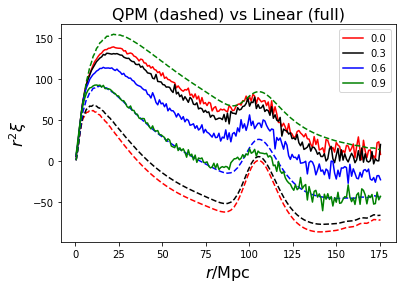

In [21]:
cols=['r','k','b','g']
for m,mu_index in enumerate([0,30,60,90]):
    plt.plot(rr,qpm_xi[:,mu_index]*rr**2.,label='%.1f'%(mu_index/100.),ls='-',c=cols[m])
    plt.plot(rr,rescale*linear_xi[:,mu_index]*rr**2.,ls='--',c=cols[m]);FS=16
plt.ylabel(r'$r^2\xi$',fontsize=FS);plt.xlabel(r'$r$/Mpc',fontsize=FS);
plt.title("QPM (dashed) vs Linear (full)",fontsize=FS);plt.legend();

Save as txt file QPM means:

In [28]:
# Now save to file:
with open("../../xi_functions/QPM_Mean_xi.txt","w") as outfile:
    for i in range(len(rr)):
        outfile.write("%.8e " %rr[i])
    outfile.write("\n")
    for j in range(len(mumu)):
        outfile.write("%.8e " %mumu[j])
    outfile.write("\n")
    for i in range(len(rr)):
        for j in range(len(mumu)):
            outfile.write("%.8e " %qpm_xi[i,j])
        outfile.write("\n")
print("Printed xi function to file")


Printed xi function to file
